___
<h1> Machine Learning </h1>
<h2> Systems Engineering and Computer Technologies / Engenharia de Sistemas e Tecnologias Informáticas
(LESTI)</h2>
<h3> Instituto Superior de Engenharia / Universidade do Algarve </h3>

[LESTI](https://ise.ualg.pt/curso/1941) / [ISE](https://ise.ualg.pt) / [UAlg](https://www.ualg.pt)

Pedro J. S. Cardoso (pcardoso@ualg.pt)

___

# $k$-Nearest Neighbors (kNN): Classification - Iris
The Iris dataset was already introduced in a previous notebook. Remember that dataset is composed of 150 samples and each sample has a unique identifier and four features: sepal length, sepal width, petal length and petal width. The dataset is composed of three classes of iris plants: Iris Setosa, Iris Versicolour and Iris Virginica. The goal is to classify each sample into one of the three classes.

The KNN classification algorithm is a non-parametric method that classifies a sample based on the class of its nearest neighbors. The number of neighbors is a parameter of the algorithm. The algorithm is based on the following steps:
1. Compute the distance between the sample to classify and all the samples in the training set.
1. Select the $k$ nearest neighbors.
1. Assign the class of the sample to classify to the class that is most frequent among the $k$ nearest neighbors.

Then the algorithm is applied to each sample in the test set and metrics are computed to evaluate the performance of the classifier.
1. Compute the accuracy of the classifier.
1. Compute the confusion matrix of the classifier.
1. Compute the precision, recall and F1-score of the classifier.
1. Repeat the steps 1 to 6 for different values of $k$ and select the best value.

See the method's documentation at https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

np.random.seed(1)

Load the iris dataset and split it into training and test sets.

In [2]:
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(
    iris.data,
    iris.target,
    shuffle=True,
    stratify= iris.target,
    random_state=42
)

Let us first apply the $k$-NN to the iris data set, using the default parameters.

In [3]:
# create a classifier and fit it to the data set
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

To compute the predictions for the test set, we use the `predict` method.

In [4]:
predictions = clf.predict(X_test)
predictions

array([0, 1, 1, 1, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 2, 1, 0, 2, 0, 1, 2, 2, 0, 0, 0, 0, 2, 1])

To check the accuracy of the classifier, we can compare the predictions with the true labels.

In [5]:
predictions == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

To check the accuracy of the classifier, we can also use the `score` method.

In [6]:
# compute the scores
clf.score(X_test, y_test)

0.9736842105263158

The classification report provides a summary of the main classification metrics.

Remember that:
- $precision =\frac{TP}{TP+FP}$
- $recall = \frac{TP}{TP+FN}$
- $F1-score = \frac{2 \times \text{precision} \times \text{recall}}{\text{precision} + \text{recall}}$

In the classification report, the macro average is the average of the metrics for each class. The weighted average is the average of the metrics for each class, weighted by the number of samples in each class.

In [7]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38


And the confusion matrix provides a summary of the classification results.

In [8]:
confusion_matrix(y_test, predictions)

array([[12,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 12]])

To study the "best" number of neighbors we can use the following code, where we compute the accuracy for different values of $k$.

In [9]:
# check the influence of the number of neighbors
scores = []
classifiers = {}

for nn in range(1, 21):
    # create a classifier and fit it to the data set
    clf = KNeighborsClassifier(n_neighbors=nn).fit(X_train, y_train)
    
    # compute the scores
    scores.append(clf.score(X_test, y_test))
    classifiers[nn] = clf

print("The scores depending on the number of neighbors are:")
list(zip(range(1, 21), scores))

The scores depending on the number of neighbors are:


[(1, 0.9473684210526315),
 (2, 0.9210526315789473),
 (3, 0.9736842105263158),
 (4, 0.9736842105263158),
 (5, 0.9736842105263158),
 (6, 0.9473684210526315),
 (7, 0.9473684210526315),
 (8, 0.9473684210526315),
 (9, 0.9736842105263158),
 (10, 0.9736842105263158),
 (11, 0.9736842105263158),
 (12, 0.9736842105263158),
 (13, 0.9473684210526315),
 (14, 0.9473684210526315),
 (15, 0.9473684210526315),
 (16, 0.9473684210526315),
 (17, 0.9473684210526315),
 (18, 0.9473684210526315),
 (19, 0.9473684210526315),
 (20, 0.9473684210526315)]

Plotting the evolution of the scores depending on the number of neighbors we can see that the best score is obtained with a minimum of $k=3$ neighbors

Text(0, 0.5, 'Score')

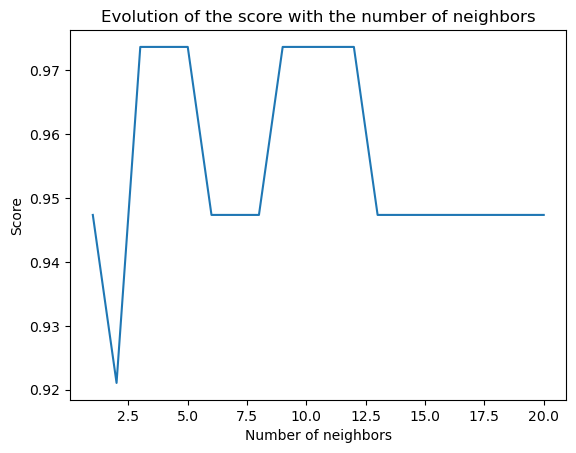

In [10]:
import matplotlib.pyplot as plt

plt.plot(range(1,21), scores)
plt.title('Evolution of the score with the number of neighbors')
plt.xlabel('Number of neighbors')
plt.ylabel('Score')

## Exercise
Study the best weights and p (metric) for a given number of neighbors (choose the one with the highest score)


## Exercise
Compute the class for the following sample: [5.1, 3.5, 1.4, 0.2]

In [11]:
for nn in range(1, 21):
        print(f"Number of neighbors: {nn}, predicted: {classifiers[nn].predict([[5.1, 3.5, 1.4, 0.2]])} ")

Number of neighbors: 1, predicted: [0] 
Number of neighbors: 2, predicted: [0] 
Number of neighbors: 3, predicted: [0] 
Number of neighbors: 4, predicted: [0] 
Number of neighbors: 5, predicted: [0] 
Number of neighbors: 6, predicted: [0] 
Number of neighbors: 7, predicted: [0] 
Number of neighbors: 8, predicted: [0] 
Number of neighbors: 9, predicted: [0] 
Number of neighbors: 10, predicted: [0] 
Number of neighbors: 11, predicted: [0] 
Number of neighbors: 12, predicted: [0] 
Number of neighbors: 13, predicted: [0] 
Number of neighbors: 14, predicted: [0] 
Number of neighbors: 15, predicted: [0] 
Number of neighbors: 16, predicted: [0] 
Number of neighbors: 17, predicted: [0] 
Number of neighbors: 18, predicted: [0] 
Number of neighbors: 19, predicted: [0] 
Number of neighbors: 20, predicted: [0] 
